***Program to implement decision trees using any standard dataset available in the public domain and find the accuracy of the algorithm.***

In [2]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
data=load_iris()


In [3]:
data.data.shape


(150, 4)

In [4]:
print('Classes to Predict: ',data.target_names)
print('Features: ',data.feature_names)


Classes to Predict:  ['setosa' 'versicolor' 'virginica']
Features:  ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [5]:
x=data.data
y=data.target
display(x.shape,y.shape)

(150, 4)

(150,)

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=50,test_size=0.25)

In [7]:
classifier=DecisionTreeClassifier() #default criterion - gini
classifier.fit(x_train,y_train)


DecisionTreeClassifier()

In [8]:
y_pred=classifier.predict(x_test)


In [9]:
from sklearn.metrics import accuracy_score
print('Accuracy on train data using Gini: ',accuracy_score(y_train,classifier.predict(x_train)))
print('Accuracy on test data using Gini: ',accuracy_score(y_test,y_pred))


Accuracy on train data using Gini:  1.0
Accuracy on test data using Gini:  0.9473684210526315


In [10]:
classifier_entropy=DecisionTreeClassifier(criterion='entropy')
classifier_entropy.fit(x_train,y_train)
y_pred_entropy=classifier_entropy.predict(x_test)
from sklearn.metrics import accuracy_score
print('Accuracy on train data using Entropy: ',accuracy_score(y_train,classifier_entropy.predict(x_train)))
print('Accuracy on test data using Entropy: ',accuracy_score(y_test,y_pred_entropy))


Accuracy on train data using Entropy:  1.0
Accuracy on test data using Entropy:  0.9473684210526315


In [11]:
classifier_entropy1=DecisionTreeClassifier(criterion='entropy',min_samples_split=50) #minimum no. of samples required to split an internal node
classifier_entropy1.fit(x_train,y_train)
y_pred_entropy1=classifier_entropy1.predict(x_test)
from sklearn.metrics import accuracy_score
print('Accuracy on train data using Entropy with min samples 50: ',accuracy_score(y_train,classifier_entropy1.predict(x_train)))
print('Accuracy on test data using Entropy with min samples 50: ',accuracy_score(y_test,y_pred_entropy1))

Accuracy on train data using Entropy with min samples 50:  0.9642857142857143
Accuracy on test data using Entropy with min samples 50:  0.9473684210526315


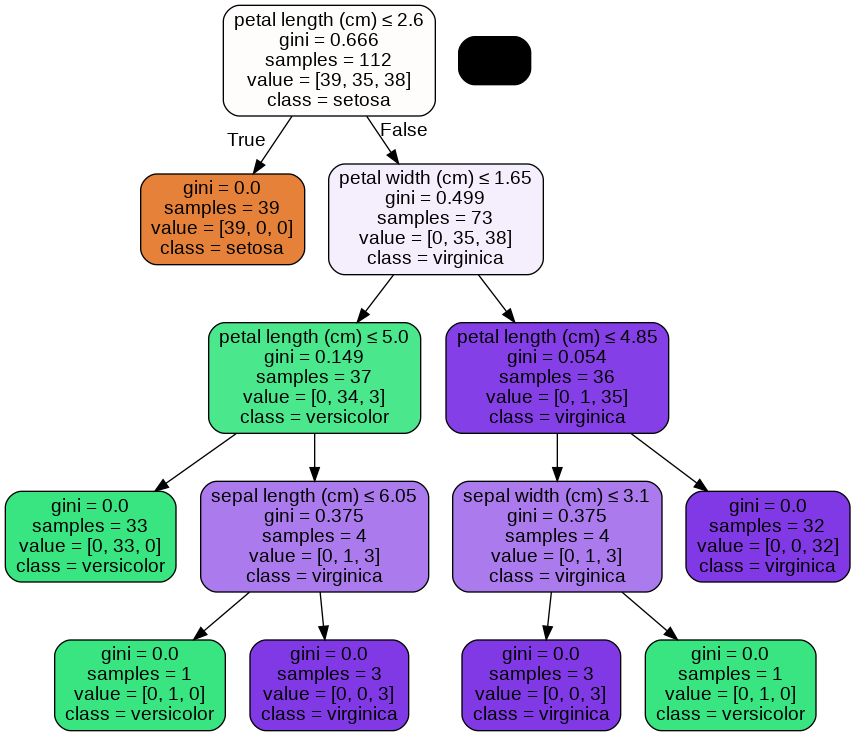

In [12]:
from sklearn.tree import export_graphviz #for visualization
from six import StringIO  #when stringIO object is created, it is initialised by passing string to constructor.If no string is passed stringIO will start empty

from IPython.display import Image #IPython is an interactive shell built with python
import pydotplus #python interface to Graphviz's Dot Language

dot_data=StringIO()

export_graphviz(classifier, out_file=dot_data, filled=True, rounded=True, special_characters=True, feature_names=data.feature_names,class_names=data.target_names)
graph=pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())


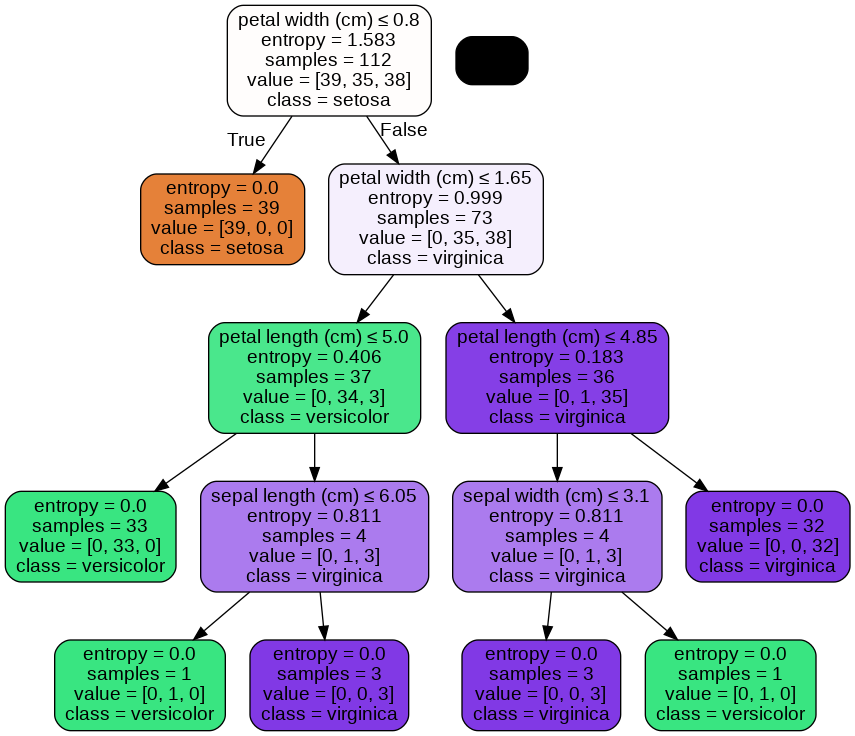

In [13]:
from sklearn.tree import export_graphviz
from six import StringIO

from IPython.display import Image
import pydotplus

dot_data=StringIO()

export_graphviz(classifier_entropy, out_file=dot_data, filled=True, rounded=True, special_characters=True, feature_names=data.feature_names,class_names=data.target_names)
graph1=pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph1.create_png())

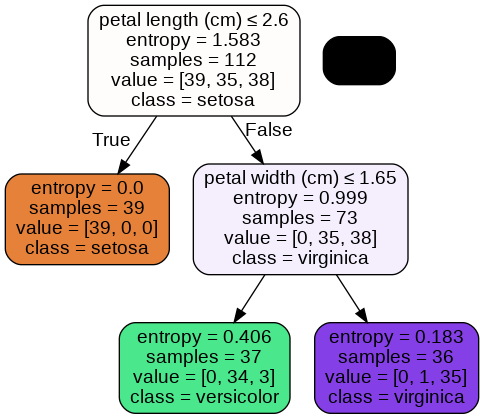

In [14]:
from sklearn.tree import export_graphviz
from six import StringIO

from IPython.display import Image
import pydotplus

dot_data=StringIO()

export_graphviz(classifier_entropy1, out_file=dot_data, filled=True, rounded=True, special_characters=True, feature_names=data.feature_names,class_names=data.target_names)
graph2=pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph2.create_png())